## Santa's Uncertain Bags EDA

Santa has 1000 bags to fill with 9 types of gifts. Due to regulations at the North Pole workshop, no bag can contain more than 50 pounds of gifts. If a bag is overweight, it is confiscated by regulators from the North Pole Department of Labor without warning! Even Santa has to worry about throwing out his bad back.

Each present has a fixed weight, but the individual weights are unknown. The weights for each present type are not identical because the elves make them in many types and sizes.

Although the weights were deleted from the database, the elves still have the blueprints for each toy. After some complex volume integrals, the elves managed to give Santa a probability distribution for the weight of each type of toy. To simulate a single gift's weight in pounds, they came up with the following numpy distribution parameters:

horse = max(0, np.random.normal(5,2,1)[0])

ball = max(0, 1 + np.random.normal(1,0.3,1)[0])

bike = max(0, np.random.normal(20,10,1)[0])

train = max(0, np.random.normal(10,5,1)[0])

coal = 47 * np.random.beta(0.5,0.5,1)[0]

book = np.random.chisquare(2,1)[0]

doll = np.random.gamma(5,1,1)[0]

block = np.random.triangular(5,10,20,1)[0]

gloves = 3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0]

gifts.csv contains the GiftIds which you must sort into Santa's bags. The text of the GiftId contains the type of toy. You do not need to include all GiftIds or all bags when submitting. The evaluation page provides full details on scoring.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

import warnings
warnings.filterwarnings("ignore")

In [35]:
plt.rcParams['axes.linewidth'] = 0.5

In [36]:
data = pd.read_csv('gifts.csv')

In [37]:
df = pd.DataFrame()
df['id'] = data['GiftId'].apply(lambda x: x.split('_')[1])
df['type'] = data['GiftId'].apply(lambda x: x.split('_')[0])
df['type'] = [x.title() for x in df['type']]
df['type'].unique()

array(['Horse', 'Ball', 'Bike', 'Train', 'Coal', 'Book', 'Doll', 'Blocks',
       'Gloves'], dtype=object)

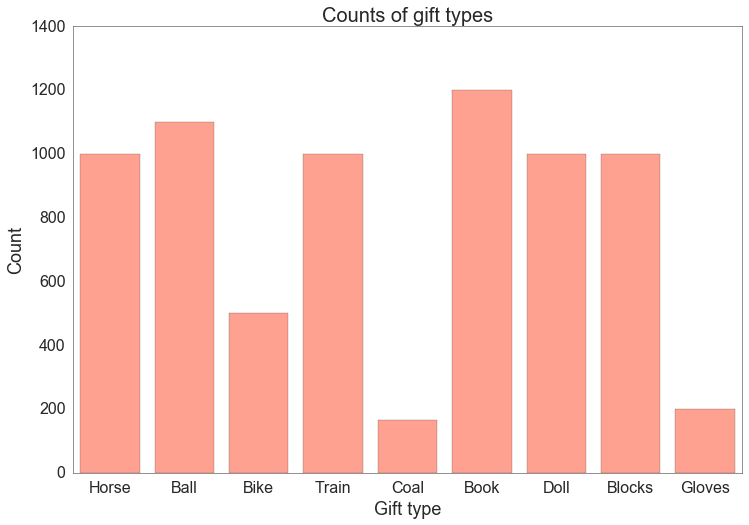

In [44]:
fig = plt.figure(figsize=(12,8))
plt.tick_params(labelsize=16)

sns.countplot(x=df.type, color='tomato', saturation=1, alpha=0.6)

plt.xlabel('Gift type', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Counts of gift types', fontsize=20)
plt.ylim(0, 1400)
plt.show()

In [39]:
def weight(gift):
    if gift == 'Horse':
        return max(0, np.random.normal(5,2,1)[0])
    if gift == 'Ball':
        return max(0, 1 + np.random.normal(1,0.3,1)[0])
    if gift == 'Bike':
        return max(0, np.random.normal(20,10,1)[0])
    if gift == 'Train':
        return max(0, np.random.normal(10,5,1)[0])
    if gift == 'Coal':
        return 47 * np.random.beta(0.5,0.5,1)[0]
    if gift == 'Book':
        return np.random.chisquare(2,1)[0]
    if gift == 'Doll':
        return np.random.gamma(5,1,1)[0]
    if gift == 'Blocks':
        return np.random.triangular(5,10,20,1)[0]
    if gift == 'Gloves':
        return 3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0]

In [40]:
df['weight'] = df['type'].apply(lambda x: weight(x))

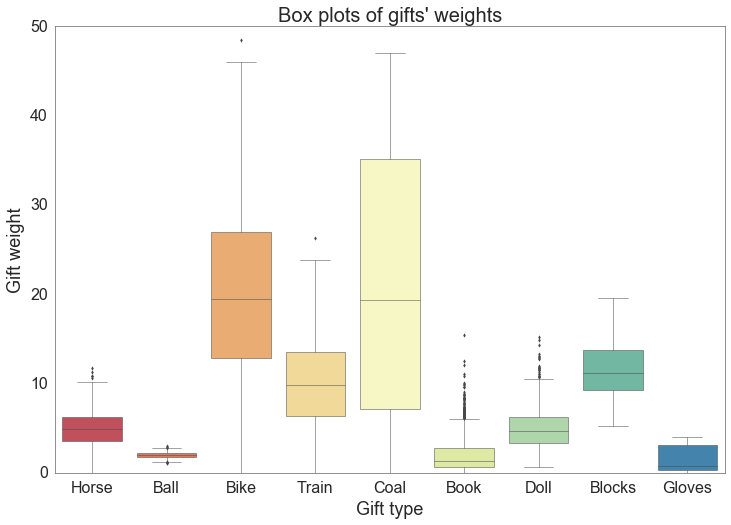

In [41]:
fig = plt.figure(figsize=(12,8))
plt.tick_params(labelsize=16)

sns.boxplot(x=df['type'], y=df.weight, palette='Spectral', linewidth=0.5, fliersize=3)

plt.xlabel('Gift type', fontsize=18)
plt.ylabel('Gift weight', fontsize=18)
plt.title('Box plots of gifts\' weights', fontsize=20)
plt.show()

In [42]:
def plot_distribution(gift_type):
    fig = plt.figure(figsize=(8,4))
    plt.tick_params(labelsize=16)

    sns.distplot(df[df['type']==gift_type]['weight'], bins=10,
                 color='tomato', hist_kws={'alpha': 0.6}, kde_kws={'lw': 5})

    plt.xlabel('Weight', fontsize=18)
    plt.title(gift_type+' weights distribution', fontsize=20)
    plt.show()

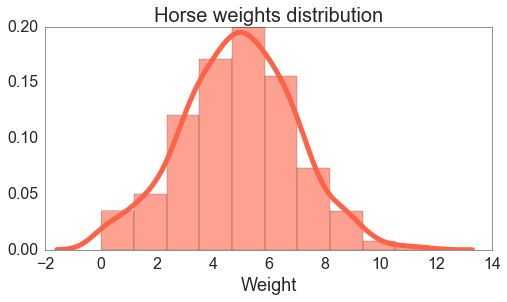

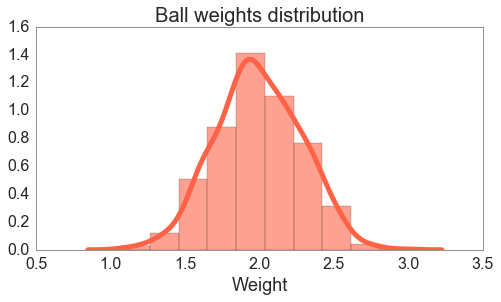

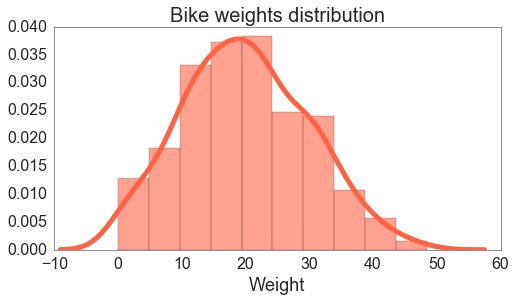

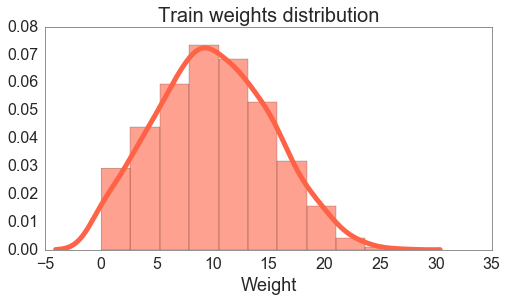

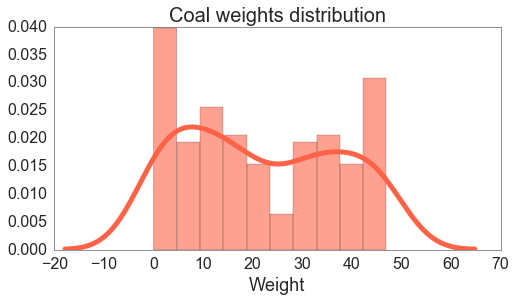

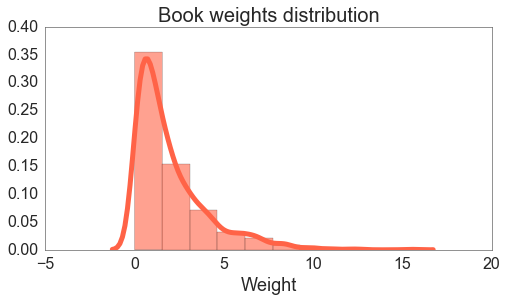

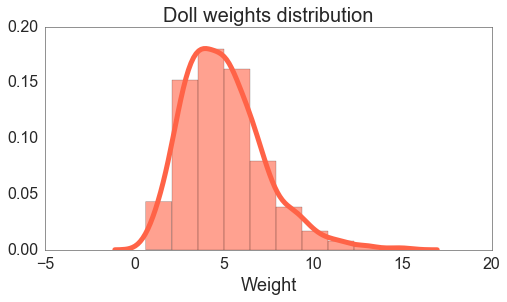

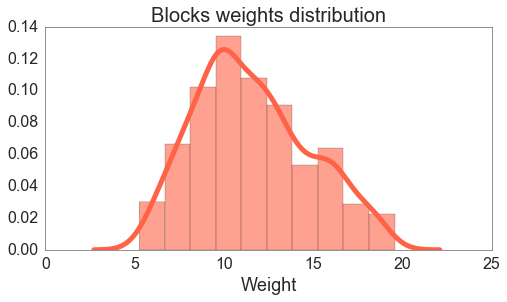

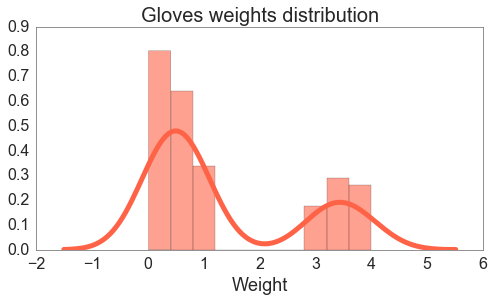

In [43]:
for gift_type in df['type'].unique():
    plot_distribution(gift_type)